In [1]:
%pylab inline
from astropy.io import fits

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Loading the mock sample, see query jupyter notebook, how to get those data
mock = np.load("data/130pc/result.npy")
mock = mock.view(np.recarray)
print(len(mock),mock.dtype)
# defining the boxes around the planetary hosts
bprp_range = 0.04
mg_range = 0.05

In [4]:
def external_uncertainty(internal_uncertainty):
    k = 1.08
    sigma_s = 0.043
    return(np.sqrt( k**2 * internal_uncertainty**2 + sigma_s**2))

def add_parallax_zero_point(parallax):
    #we take the zero point for brighter sources, not for the quasar sample
    return(parallax+0.050)

In [6]:
# From DR2 ZP
G0 = 25.6884
B0 = 25.3514
R0 = 24.7619
nsample = 1000

In [7]:
#HD33142
data = fits.getdata("HD33142.fits")

# Just looking at the range of BP-RP and MG
gmag = -2.5* np.log10(np.random.normal(data.phot_g_mean_flux,data.phot_g_mean_flux_error,nsample))+G0
bpmag =  -2.5* np.log10(np.random.normal(data.phot_bp_mean_flux,data.phot_bp_mean_flux_error,nsample))+B0
rpmag =  -2.5* np.log10(np.random.normal(data.phot_rp_mean_flux,data.phot_rp_mean_flux_error,nsample))+R0
parallax = np.random.normal(add_parallax_zero_point(data.parallax),external_uncertainty(data.parallax_error),nsample)
bprp = bpmag - rpmag
mg = gmag + 5*np.log10(np.divide(parallax,100))
print("Scatter from the data")
print("BPRP +-",np.median(bprp), np.std(bprp))
print("MG +-",np.median(mg), np.std(mg))
print("#####################")
# Picking the mean values
bprp_mean = data.phot_bp_mean_mag -data.phot_rp_mean_mag
bprp = mock.phot_bp_mean_mag - mock.phot_rp_mean_mag
mg_data = data.phot_g_mean_mag + 5 * np.log10(np.divide(data.parallax+0.05,100))
mg_mock = mock.phot_g_mean_mag + 5 * np.log10(np.divide(mock.parallax+0.05,100))

# Cutting those values
cut = (bprp < bprp_mean + bprp_range) & (bprp > bprp_mean - bprp_range) & (mg_mock > mg_data - mg_range) & (mg_mock < mg_data + mg_range)

# Printing out the properties of the selected GDR2 mock stars
print("Parameter distribution of the underlying GDR2mock sample")
for item in ["mass","age","logg","a0","feh","teff_val","lum_val","radius_val"]:
    lower = np.percentile(mock[item][cut],16)
    median = np.percentile(mock[item][cut],50)
    upper = np.percentile(mock[item][cut],84)
    print(item,median, "+", upper - median ,"-" , median-lower, len(mock[item][cut]))

Scatter from the data
BPRP +- 1.0959491668623986 0.001909236294813165
MG +- 2.298270879205374 0.016097813436924298
#####################
Parameter distribution of the underlying GDR2mock sample
mass 1.105085015296936 + 0.1338009738922119 - 0.09754901409149164 14
age 6.275434970855713 + 2.414210071563719 - 1.7512871932983396 14
logg 3.205035090446472 + 0.0641121721267699 - 0.04339276790618918 14
a0 0.02318004984408617 + 0.04552230816334486 - 0.013611664474010467 14
feh -0.3511735051870346 + 0.16754127144813538 - 0.05937317907810208 14
teff_val 4978.635009765625 + 20.763935546874563 - 50.417763671875036 14
lum_val 10.236999988555908 + 0.12059232711792056 - 0.43477834701537965 14
radius_val 4.329406976699829 + 0.03066971778869565 - 0.1304171657562252 14


In [8]:
#HD76700
data = fits.getdata("HD76700.fits")

gmag = -2.5* np.log10(np.random.normal(data.phot_g_mean_flux,data.phot_g_mean_flux_error,nsample))+G0
bpmag =  -2.5* np.log10(np.random.normal(data.phot_bp_mean_flux,data.phot_bp_mean_flux_error,nsample))+B0
rpmag =  -2.5* np.log10(np.random.normal(data.phot_rp_mean_flux,data.phot_rp_mean_flux_error,nsample))+R0
parallax = np.random.normal(add_parallax_zero_point(data.parallax),external_uncertainty(data.parallax_error),nsample)
bprp = bpmag - rpmag
mg = gmag + 5*np.log10(np.divide(parallax,100))
print("Scatter from the data")
print("BPRP +-",np.median(bprp), np.std(bprp))
print("MG +-",np.median(mg), np.std(mg))
print("#####################")
bprp_mean = data.phot_bp_mean_mag -data.phot_rp_mean_mag
bprp = mock.phot_bp_mean_mag - mock.phot_rp_mean_mag

mg_data = data.phot_g_mean_mag + 5 * np.log10(np.divide(data.parallax+0.05,100))
mg_mock = mock.phot_g_mean_mag + 5 * np.log10(np.divide(mock.parallax+0.05,100))

cut = (bprp < bprp_mean + bprp_range) & (bprp > bprp_mean - bprp_range) & (mg_mock > mg_data - mg_range) & (mg_mock < mg_data + mg_range)
print("Parameter distribution of the underlying GDR2mock sample")
# Printing out the properties of the selected GDR2 mock stars
for item in ["mass","age","logg","a0","feh","teff_val","lum_val","radius_val"]:
    lower = np.percentile(mock[item][cut],16)
    median = np.percentile(mock[item][cut],50)
    upper = np.percentile(mock[item][cut],84)
    print(item,median, "+", upper - median ,"-" , median-lower, len(mock[item][cut]))

Scatter from the data
BPRP +- 0.8852537344845679 0.0028335339947041216
MG +- 4.054070183606258 0.007431244661551214
#####################
Parameter distribution of the underlying GDR2mock sample
mass 1.0801349878311157 + 0.1027790069580079 - 0.07123498916625959 66
age 6.2541749477386475 + 3.5029232501983643 - 2.9514168739318842 66
logg 4.224725008010864 + 0.05783705711364728 - 0.06453909873962438 66
a0 0.1266534999012947 + 0.32149209827184677 - 0.10413791947066783 66
feh 0.04568039998412132 + 0.12228939905762679 - 0.16242199763655663 66
teff_val 5931.635009765625 + 281.2329589843757 - 156.72700195312427 66
lum_val 1.9224900007247925 + 0.5221079111099245 - 0.13939399719238277 66
radius_val 1.336999773979187 + 0.050015282630920366 - 0.03872027397155753 66


In [9]:
#HD205739
data = fits.getdata("HD205739.fits")

gmag = -2.5* np.log10(np.random.normal(data.phot_g_mean_flux,data.phot_g_mean_flux_error,nsample))+G0
bpmag =  -2.5* np.log10(np.random.normal(data.phot_bp_mean_flux,data.phot_bp_mean_flux_error,nsample))+B0
rpmag =  -2.5* np.log10(np.random.normal(data.phot_rp_mean_flux,data.phot_rp_mean_flux_error,nsample))+R0
parallax = np.random.normal(add_parallax_zero_point(data.parallax),external_uncertainty(data.parallax_error),nsample)
bprp = bpmag - rpmag
mg = gmag + 5*np.log10(np.divide(parallax,100))
print("Scatter from the data")
print("BPRP +-",np.median(bprp), np.std(bprp))
print("MG +-",np.median(mg), np.std(mg))
print("#####################")
bprp_mean = data.phot_bp_mean_mag -data.phot_rp_mean_mag
bprp = mock.phot_bp_mean_mag - mock.phot_rp_mean_mag

mg_data = data.phot_g_mean_mag + 5 * np.log10(np.divide(data.parallax+0.05,100))
mg_mock = mock.phot_g_mean_mag + 5 * np.log10(np.divide(mock.parallax+0.05,100))

cut = (bprp < bprp_mean + bprp_range) & (bprp > bprp_mean - bprp_range) & (mg_mock > mg_data - mg_range) & (mg_mock < mg_data + mg_range)
print("Parameter distribution of the underlying GDR2mock sample")
# Printing out the properties of the selected GDR2 mock stars
for item in ["mass","age","logg","a0","feh","teff_val","lum_val","radius_val"]:
    lower = np.percentile(mock[item][cut],16)
    median = np.percentile(mock[item][cut],50)
    upper = np.percentile(mock[item][cut],84)
    print(item,median, "+", upper - median ,"-" , median-lower, len(mock[item][cut]))

Scatter from the data
BPRP +- 0.6907640816739242 0.0016921912418920975
MG +- 3.5936741657970908 0.02275815942370575
#####################
Parameter distribution of the underlying GDR2mock sample
mass 1.215880036354065 + 0.08050597190856923 - 0.1589684247970582 553
age 3.0193800926208496 + 3.115839443206787 - 1.3155765104293824 553
logg 4.225510120391846 + 0.05664663314819318 - 0.08176048278808601 553
a0 0.0275689996778965 + 0.0484106184542179 - 0.015684491842985152 553
feh -0.03759650141000748 + 0.15466569989919662 - 0.27841154783964156 553
teff_val 6276.5498046875 + 103.51025390625 - 111.81269531250018 553
lum_val 2.7438700199127197 + 0.12268157005310076 - 0.10917721748352083 553
radius_val 1.405426263809204 + 0.051948623657226634 - 0.050772194862365616 553


In [10]:
# We use a bigger font for you to see better on the beamer
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

/home/rybizki/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


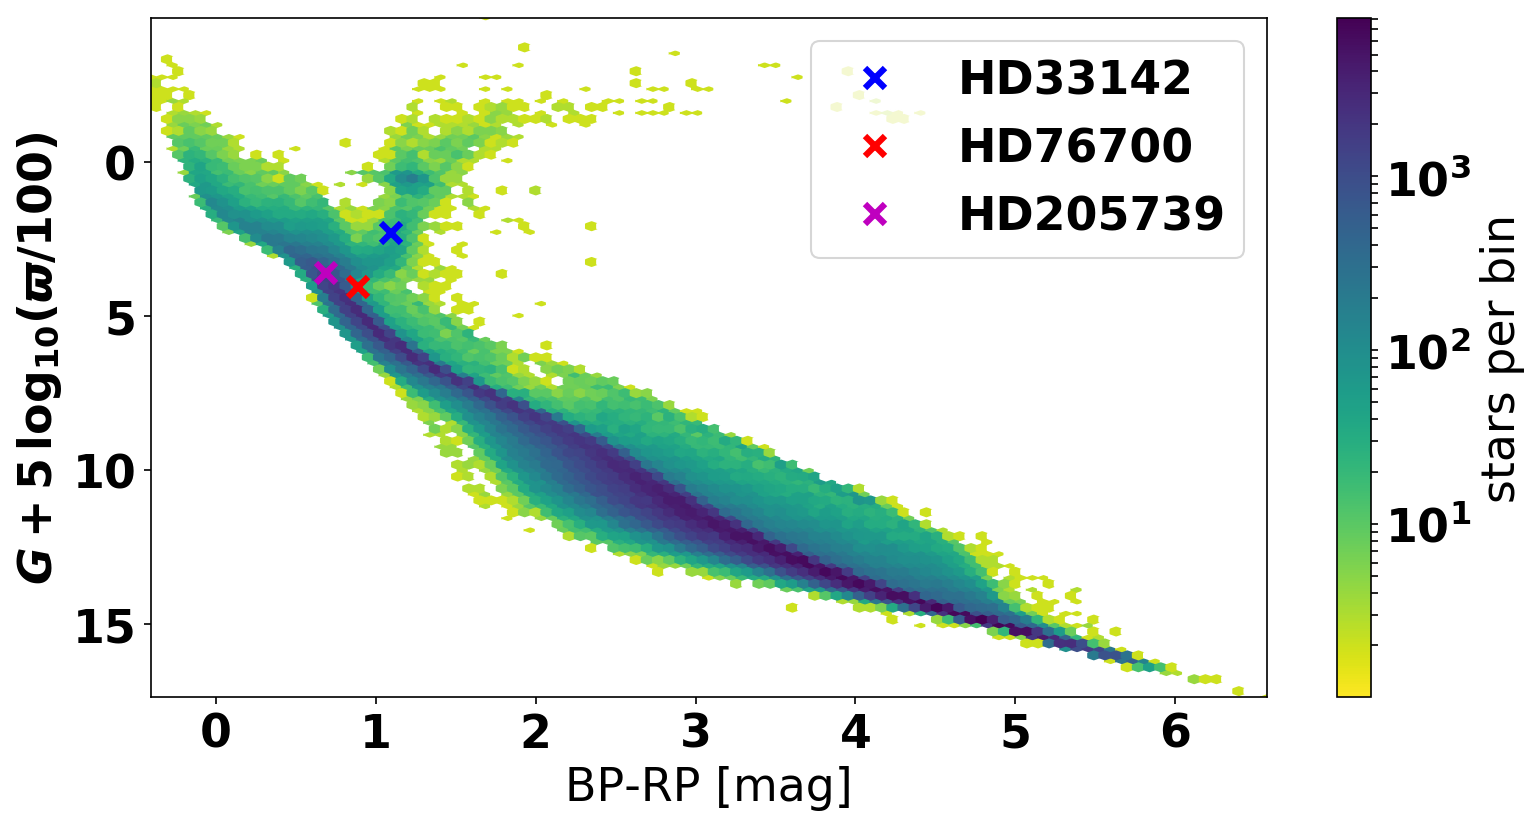

In [11]:
fig = plt.figure(figsize=(12,6), dpi = 150)
cs = plt.hexbin(mock.phot_bp_mean_mag-mock.phot_rp_mean_mag,mock.phot_g_mean_mag + 5*np.log10(np.divide(mock.parallax,100)),
           gridsize = 100, norm = matplotlib.colors.LogNorm(), cmap = matplotlib.cm.viridis_r)
for item, color in zip(["HD33142","HD76700","HD205739"],["b","r","m"]):
    x = fits.getdata(item + ".fits")
    plt.plot(x.phot_bp_mean_mag - x.phot_rp_mean_mag,
             x.phot_g_mean_mag + 5*np.log10(np.divide(x.parallax+0.05,100)),
             'x', color = color, ms = 10, mew = 3, label = item)
plt.gca().invert_yaxis()
cs.cmap.set_under(color = 'white')
cs.set_clim(1.01, None)
plt.colorbar(cs, label = "stars per bin")
plt.xlabel('BP-RP [mag]')
plt.ylabel(r'$G+5\,\log_{10}(\varpi/100)$')
plt.legend()

BPRP +- 1.0959511823701362 0.0019411946601116442
MG +- 2.2978773666287475 0.016678968847904325
BPRP +- 0.8855701447916449 0.0029384579027681274
MG +- 4.053559429173375 0.007392267884956219
BPRP +- 0.6907950465765307 0.0017852952539835498
MG +- 3.5946326693109647 0.023684412590163885


/home/rybizki/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


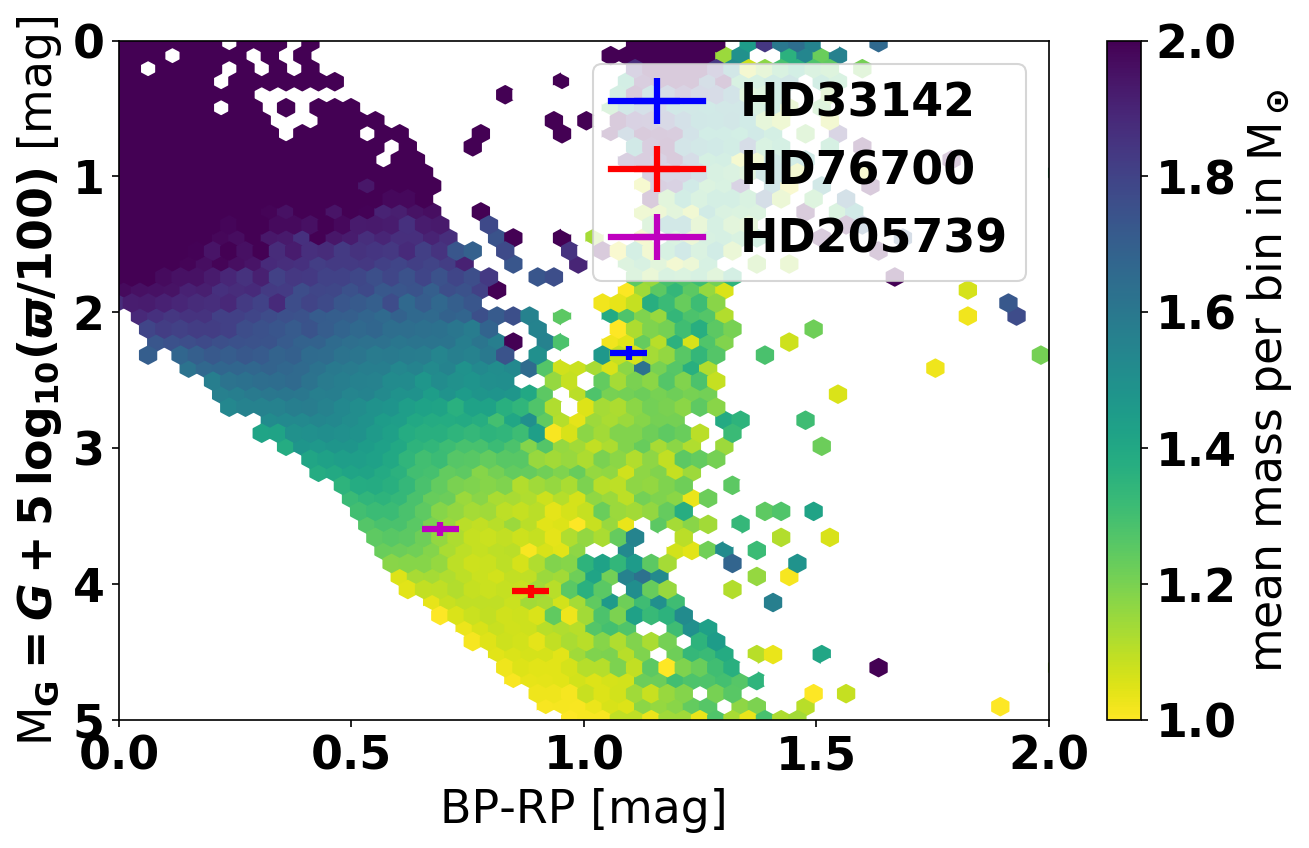

In [22]:
from matplotlib.patches import Rectangle

plt.figure(figsize=(10,6), dpi = 150)
cs = plt.hexbin(mock.phot_bp_mean_mag-mock.phot_rp_mean_mag,mock.phot_g_mean_mag + 5*np.log10(np.divide(mock.parallax,100)),
           C = mock.mass,gridsize = 200, cmap = matplotlib.cm.viridis_r)#, norm = matplotlib.colors.LogNorm())
for item, color in zip(["HD33142","HD76700","HD205739"],["b","r","m"]):
    x = fits.getdata(item + ".fits")
    #plt.plot(x.phot_bp_mean_mag - x.phot_rp_mean_mag,
    #         x.phot_g_mean_mag + 5*np.log10(np.divide(x.parallax+0.05,100)),
    #         'x', color = color, ms = 13, mew = 3, label = item)
    
    # error in the data
    gmag = -2.5* np.log10(np.random.normal(x.phot_g_mean_flux,x.phot_g_mean_flux_error,nsample))+G0
    bpmag =  -2.5* np.log10(np.random.normal(x.phot_bp_mean_flux,x.phot_bp_mean_flux_error,nsample))+B0
    rpmag =  -2.5* np.log10(np.random.normal(x.phot_rp_mean_flux,x.phot_rp_mean_flux_error,nsample))+R0
    parallax = np.random.normal(add_parallax_zero_point(x.parallax),external_uncertainty(x.parallax_error),nsample)
    bprp = bpmag - rpmag
    mg = gmag + 5*np.log10(np.divide(parallax,100))
    print("BPRP +-",np.median(bprp), np.std(bprp))
    print("MG +-",np.median(mg), np.std(mg))
    #plt.errorbar(np.median(bprp),np.median(mg),np.std(mg),np.std(bprp), color = color, label = item)
    # selected box
    plt.errorbar(np.median(bprp),np.median(mg),0.05,0.04, color = color, label = item, lw = 3)
    #rect = Rectangle((np.median(bprp) - 0.04, np.median(mg) - 0.05), 2*0.04, 2*0.05, color = color, alpha = 0.5)
    #plt.gca().add_artist(rect)
#cs.cmap.set_under(color = 'white')
cs.set_clim(1, 2)
plt.colorbar(cs, label = r"mean mass per bin in M$_\odot$")
plt.xlabel('BP-RP [mag]')
plt.ylabel(r'M$_\mathrm{G}=G+5\,\log_{10}(\varpi/100)$ [mag]')
plt.ylim((2.2,4.2))
plt.xlim((0.65,1.15))
plt.ylim((0.,5))
plt.xlim((0.,2.))



plt.gca().invert_yaxis()

plt.legend(loc = 'best')